In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.9/411.9 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.8/183.8 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 27.0 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15547 sha256=1909bed99a13ed0d1f17ec112dcbbce82e858c21112f284b8064a1b4556871f5
  Stored in directory: /root/.cache/pip/wheels/e9/25/85/25d2e1cfc0ece64b930b16972f7e4cc3599c43b531f1eba06d
Successfully built multitasking

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [7]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 830.5 kB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Not uninstalling pip at /usr/local/lib/python3.10/site-packages, outside environment /root/venv
    Can't uninstall 'pip'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import yfinance as yf

data = yf.download("RELIANCE.NS", start="2019-01-01", end="2024-01-01")
data.to_csv("reliance_data.csv")

print("Reliance file created successfully!")


[*********************100%***********************]  1 of 1 completed
Reliance file created successfully!


In [28]:
import pandas as pd

# Load raw file
df = pd.read_csv("reliance_data.csv")

# Drop first two garbage rows
df = df.iloc[2:]

# Rename first column to Date
df.rename(columns={"Price": "Date"}, inplace=True)

# Convert Date column
df["Date"] = pd.to_datetime(df["Date"])

# Convert numeric columns
cols = ["Close", "High", "Low", "Open", "Volume"]
for c in cols:
    df[c] = pd.to_numeric(df[c])

# Save clean file
df.to_csv("reliance_clean.csv", index=False)

print("CSV cleaned successfully!")


CSV cleaned successfully!


In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv("reliance_clean.csv")

df["Log_Return"] = np.log(df["Close"] / df["Close"].shift(1))
df = df.dropna()

df.to_csv("reliance_returns.csv", index=False)
print("Log returns created successfully!")


Log returns created successfully!


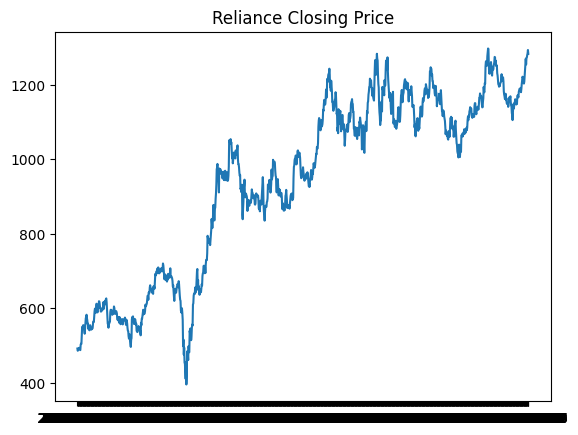

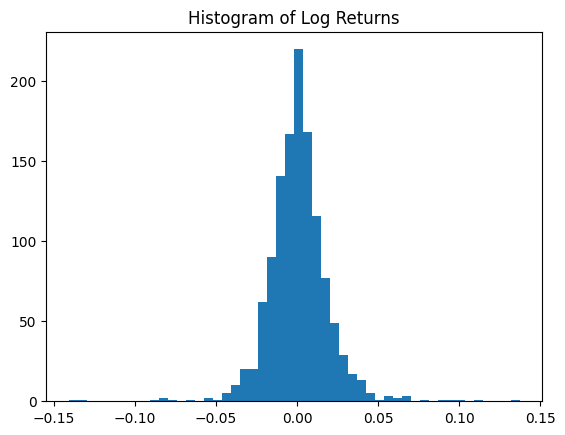

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("reliance_returns.csv")

plt.figure()
plt.plot(df["Date"], df["Close"])
plt.title("Reliance Closing Price")
plt.show()

plt.figure()
plt.hist(df["Log_Return"], bins=50)
plt.title("Histogram of Log Returns")
plt.show()


Mean (mu): 0.0007660902163928166
Std Dev (sigma): 0.019097261962211752


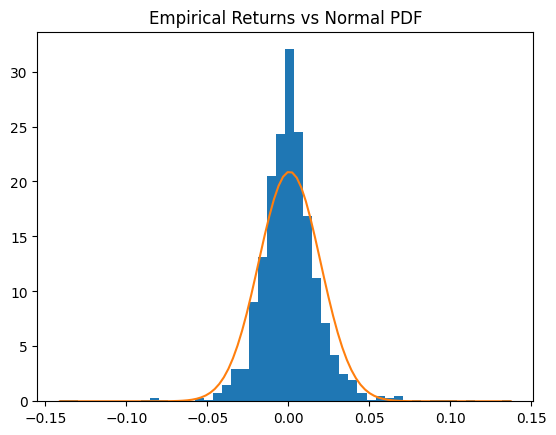


KS Statistic: 0.07376703398236895
P-value: 2.7613784649153417e-06
Result: Reject Normality


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load return data
df = pd.read_csv("reliance_returns.csv")

returns = df["Log_Return"]

# Estimate parameters
mu = returns.mean()
sigma = returns.std()

print("Mean (mu):", mu)
print("Std Dev (sigma):", sigma)

# Plot histogram with normal curve
x = np.linspace(returns.min(), returns.max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.figure()
plt.hist(returns, bins=50, density=True)
plt.plot(x, pdf)
plt.title("Empirical Returns vs Normal PDF")
plt.show()

# Kolmogorov-Smirnov Test
ks_stat, p_value = stats.kstest(returns, 'norm', args=(mu, sigma))

print("\nKS Statistic:", ks_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Result: Reject Normality")
else:
    print("Result: Cannot Reject Normality")


In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv("reliance_returns.csv")
returns = df["Log_Return"]

alpha = 0.95

# Empirical VaR
VaR = -np.quantile(returns, 1 - alpha)

# Expected Shortfall
ES = -returns[returns <= -VaR].mean()

print("Empirical 95% VaR:", VaR)
print("Empirical 95% Expected Shortfall:", ES)


Empirical 95% VaR: 0.024735240895872368
Empirical 95% Expected Shortfall: 0.040535790410576374


Monte Carlo VaR 95%: 0.030677627065578753
Monte Carlo Expected Shortfall: 0.03785235772443473


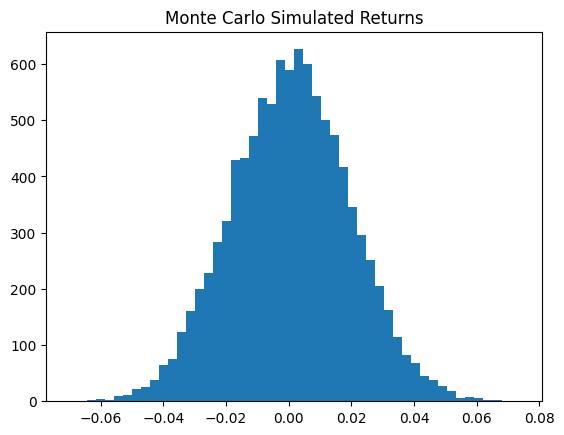

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("reliance_returns.csv")
returns = df["Log_Return"]

mu = returns.mean()
sigma = returns.std()

N = 10000   # simulations
sim_returns = np.random.normal(mu, sigma, N)

# Parametric VaR & ES
alpha = 0.95
VaR_mc = -np.quantile(sim_returns, 1 - alpha)
ES_mc = -sim_returns[sim_returns <= -VaR_mc].mean()

print("Monte Carlo VaR 95%:", VaR_mc)
print("Monte Carlo Expected Shortfall:", ES_mc)

# Plot
plt.figure()
plt.hist(sim_returns, bins=50)
plt.title("Monte Carlo Simulated Returns")
plt.show()


In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv("reliance_returns.csv")
returns = df["Log_Return"].values

alpha = 0.95
B = 1000
var_boot = []

n = len(returns)

for i in range(B):
    sample = np.random.choice(returns, size=n, replace=True)
    var = -np.quantile(sample, 1 - alpha)
    var_boot.append(var)

var_boot = np.array(var_boot)

print("Bootstrap VaR Mean:", var_boot.mean())
print("95% CI Lower:", np.quantile(var_boot, 0.025))
print("95% CI Upper:", np.quantile(var_boot, 0.975))


Bootstrap VaR Mean: 0.024906254899124822
95% CI Lower: 0.022580891461222715
95% CI Upper: 0.027787494716149615


In [49]:
import yfinance as yf

data = yf.download("HDFCBANK.NS", start="2019-01-01", end="2024-01-01")
data.to_csv("hdfc_data.csv")

print("HDFC data downloaded!")


[*********************100%***********************]  1 of 1 completed
HDFC data downloaded!


In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv("hdfc_data.csv")
df = df.iloc[2:]
df.rename(columns={"Price":"Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])

cols = ["Close","High","Low","Open","Volume"]
for c in cols:
    df[c] = pd.to_numeric(df[c])

df["Log_Return"] = np.log(df["Close"]/df["Close"].shift(1))
df = df.dropna()

df.to_csv("hdfc_returns.csv", index=False)
print("HDFC returns ready!")


HDFC returns ready!


In [57]:
import pandas as pd
import numpy as np

r1 = pd.read_csv("reliance_returns.csv")["Log_Return"]
r2 = pd.read_csv("hdfc_returns.csv")["Log_Return"]

n = min(len(r1), len(r2))
r1, r2 = r1[:n], r2[:n]

w1, w2 = 0.5, 0.5
Rp = w1*r1 + w2*r2

VaR_p = -np.quantile(Rp, 0.05)

print("Portfolio VaR 95%:", VaR_p)
print("Reliance VaR 95%:", -np.quantile(r1,0.05))
print("HDFC VaR 95%:", -np.quantile(r2,0.05))


Portfolio VaR 95%: 0.020768470915941042
Reliance VaR 95%: 0.024735240895872375
HDFC VaR 95%: 0.024072162251313856


In [1]:
import pandas as pd
import numpy as np

r1 = pd.read_csv("reliance_returns.csv")["Log_Return"]
r2 = pd.read_csv("hdfc_returns.csv")["Log_Return"]

n = min(len(r1), len(r2))
r1, r2 = r1[:n], r2[:n]

corr = np.corrcoef(r1, r2)[0,1]

print("Correlation between Reliance & HDFC:", corr)


Correlation between Reliance & HDFC: 0.4321739985556182


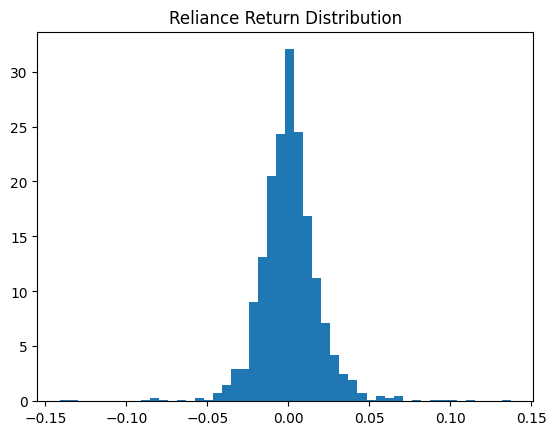

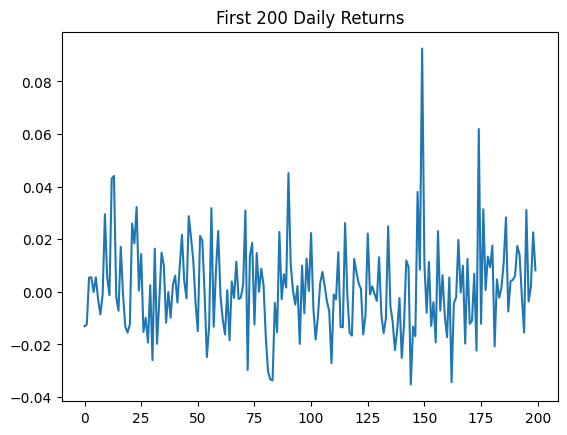

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r = pd.read_csv("reliance_returns.csv")["Log_Return"]

plt.figure()
plt.hist(r, bins=50, density=True)
plt.title("Reliance Return Distribution")
plt.show()

plt.figure()
plt.plot(r.values[:200])
plt.title("First 200 Daily Returns")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4e80ecd-af08-4c5a-8f0a-c8c46b34deb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>